In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import lxml.html as lh

<b> grap data from the website</b>

In [2]:
bike = 'https://www.worldometers.info/bicycles/' #assign the web page

page = requests.get(bike) # create a handle to for contents of the bike page

doc = lh.fromstring(page.content) # store content of the bike page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 row

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

<b> Check the table header</b>

In [3]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0
for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Country 
2:Quantity
3:Year


<b> Check the data in other rows</b>

In [4]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=3: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

<b> To see the No of Rows and Columns</b>

In [5]:
[len(C) for (title,C) in col]

[25, 25, 25]

<b> Create a dataframe and read the file</b>

In [6]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [7]:
df.head()

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996


In [8]:
df.tail()

,Country,Quantity,Year
20,Switzerland,"3,800,000",1996
21,Hungary,"3,500,000",1995
22,Australia,"3,300,000",1995
23,Finland,"3,250,000",1995
24,Norway,"3,000,000",1995


In [9]:
df

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990
6,Indonesia,"22,300,000",1982
7,Italy,"23,000,000",1995
8,UK,"20,000,000",1995
9,France,"20,000,000",1995


In [10]:
df.dtypes

Country     object
Quantity    object
Year        object
dtype: object

<h2> Data Cleaning</h2>

1. Drop Row 0

In [15]:
df2 =df.drop([df.index[0]])
df2.head()

,Country,Quantity,Year
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990


<b> Replace the Symbol , with an empty space in Quantity and convert the string to float</b>

In [16]:

df2['Quantity'] = df2.Quantity.str.replace(',', '').astype(float)
df2.head()

,Country,Quantity,Year
1,China,450000000.0,1992
2,USA,100000000.0,1995
3,Japan,72540000.0,1996
4,Germany,62000000.0,1996
5,India,30800000.0,1990


In [17]:
df2.dtypes

Country      object
Quantity    float64
Year         object
dtype: object

<b> Convert Year and Quantity back to Int</b>

In [18]:
df2['Year'] = df2.Year.astype(int)
df2['Quantity'] = df2.Quantity.astype(int)

df.head()

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996


In [19]:
df2.dtypes

Country     object
Quantity     int32
Year         int32
dtype: object

In [20]:
df2.tail()

,Country,Quantity,Year
20,Switzerland,3800000,1996
21,Hungary,3500000,1995
22,Australia,3300000,1995
23,Finland,3250000,1995
24,Norway,3000000,1995


<h2> Plot Chars and Graphs</h2>

<b> 1. Categorical variables</b>

<b> A. Let's look at the relationship between "Year" and "Quantity"</b>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Year', ylabel='Quantity'>

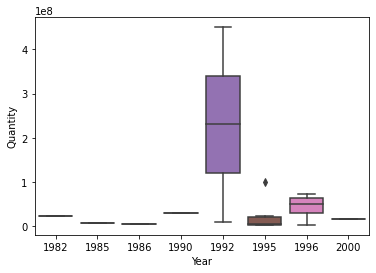

In [22]:
sns.boxplot(x="Year", y="Quantity", data=df2)

Text(0.5, 1.0, 'Bicycles sales')

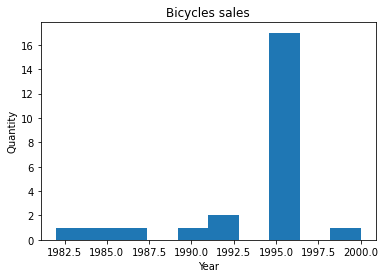

In [23]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df2["Year"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

Text(0.5, 1.0, 'Bicycles sales')

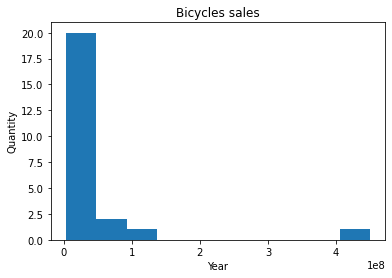

In [24]:
plt.pyplot.hist(df2["Quantity"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

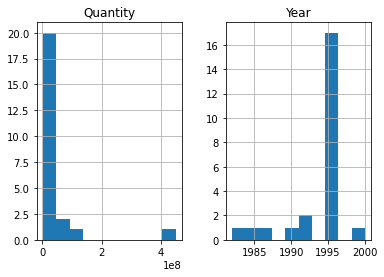

In [25]:
df2.hist()

<h2> Class Activity</h2>

<AxesSubplot:ylabel='Quantity'>

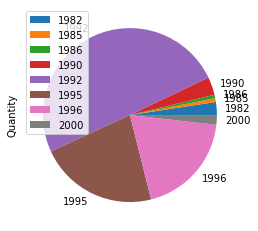

In [26]:
# write codes that can produce this pie chart

In [28]:
df2.sort_values(by='Quantity', ascending=True, inplace=True)
# get top 25 countries
df21 = df2['Quantity'].tail(25)

df21

24      3000000
23      3250000
22      3300000
21      3500000
20      3800000
19      4500000
18      5000000
17      5200000
16      6000000
14      6000000
15      6500000
13      6950000
12     10150000
11     16500000
9      20000000
8      20000000
6      22300000
7      23000000
5      30800000
10     40000000
4      62000000
3      72540000
2     100000000
1     450000000
Name: Quantity, dtype: int32

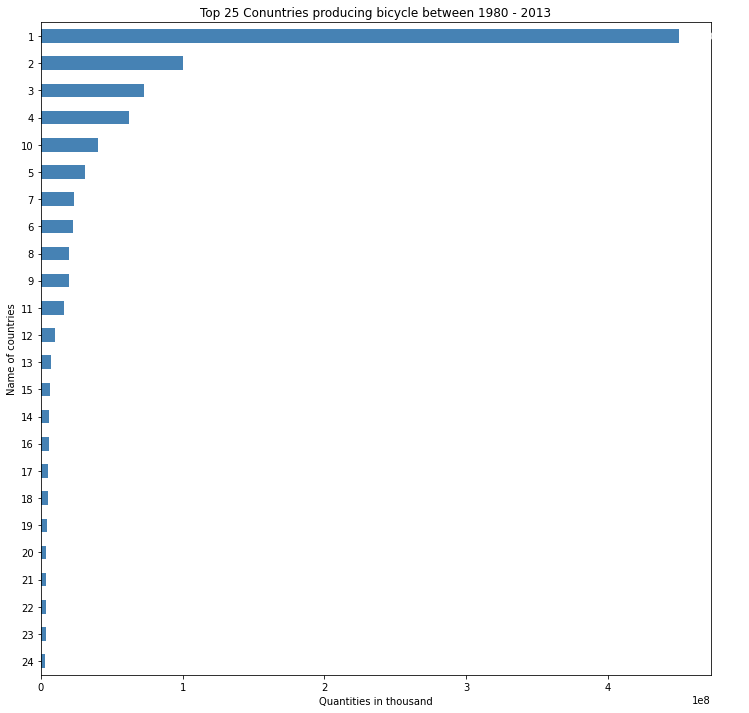

In [30]:
# Write codes that can produce this bar graph seen


In [ ]:
# Write your Conclusion here in Markdown